In [14]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [3]:
latent = pickle.load( open( "data.p", "rb" ) )
distances = pickle.load( open( "distances_normal.p", "rb" ) )

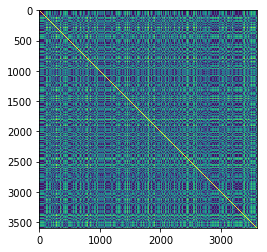

In [4]:
plt.imshow(distances)
plt.show()

In [25]:
def min_k(x, x_id, k):
    val = [(v, i) for i, v in enumerate(list(x)) if i != x_id]
    val = sorted(val, key=lambda x: x[0])
    return val[0:k]

def is_max(i, knn, densities):
    maximum = True
    for k in knn:
        maximum = maximum and densities[i] > densities[k[1]] 
    return maximum
    
def dense_region(i, knn):
    knn_ids = [x[1] for x in knn]
    knn_ids.append(i)
    return knn_ids
    
def density(x, k):
    knns = []
    for i in range(0, len(x)):
        knns.append(min_k(x[i, :], i, k))
    dense = np.zeros(len(knns))
    for i, knn in enumerate(knns):
        dense[i] = 1.0 / knn[-1][0]
    return [dense_region(i, knn) for i, knn in enumerate(knns) if is_max(i, knn, dense)]
    
print(len(density(distances, 5)))

density(distances, 5)

30


[[1204, 26, 305, 31, 1148, 29],
 [3387, 1801, 3448, 2699, 2846, 151],
 [3292, 918, 1430, 994, 886, 629],
 [3358, 2102, 2307, 2286, 2517, 796],
 [2721, 2359, 2288, 1587, 3110, 837],
 [1884, 252, 734, 2056, 3439, 923],
 [1695, 2352, 1406, 3446, 804, 983],
 [3583, 3409, 2142, 348, 367, 1060],
 [1160, 1538, 1108, 2668, 2529, 1092],
 [3100, 2716, 3517, 646, 3191, 1465],
 [948, 1583, 74, 1523, 536, 1570],
 [450, 2208, 2468, 3476, 2405, 1686],
 [3018, 1780, 1417, 1468, 1902, 1747],
 [175, 2770, 1002, 97, 562, 1823],
 [3518, 670, 1207, 2593, 1366, 2003],
 [1947, 1110, 1091, 1850, 1290, 2172],
 [2551, 2555, 3347, 1696, 3313, 2596],
 [2439, 2259, 1398, 1865, 919, 2658],
 [1976, 2619, 3548, 3510, 986, 2832],
 [1073, 1820, 2316, 3146, 2715, 2842],
 [2493, 603, 2574, 2309, 530, 3004],
 [3195, 2989, 1572, 962, 2251, 3020],
 [1462, 622, 3360, 167, 2021, 3052],
 [1493, 3059, 3516, 1821, 3186, 3140],
 [3540, 3350, 2434, 1858, 212, 3160],
 [169, 2202, 1023, 3145, 3194, 3243],
 [3415, 653, 3545, 3328, 31